## Observations and Insights

1. Regimen count for all is the same. Here on the given csv file for each mouse is associated with one drug regimen association. From the Bar Graph all the Regimen counts are same which means that drugs were tested in almost equal proportions. 
2. The Pie Chart says that the Mouse sex ratio is almost equal. 
3. From LIne graph it can be concluded that when for a Single mouse of ID s185 when treated with a Drug :Capomulin	 As the time increases the tumor volumne decreased
4. From Scatter plot we can say that as the weight of the mouse increases the spread of the average Tumor volumns decreases. 
5. from the Correlation Matrix we got .53 which means that they Mouse weight vs average tumor volumne wrt to Capomulin drug are not highly correlated 

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
mouse_metadata.groupby('Drug Regimen').describe()

Age_months                                                  \
                  count    mean       std  min    25%   50%   75%   max   
Drug Regimen                                                              
Capomulin          25.0  14.040  7.850053  1.0   7.00  17.0  21.0  24.0   
Ceftamin           25.0  12.800  8.113774  2.0   6.00  12.0  20.0  24.0   
Infubinol          25.0  16.400  7.444237  1.0  11.00  19.0  23.0  24.0   
Ketapril           25.0  14.720  6.471218  1.0  11.00  17.0  19.0  24.0   
Naftisol           25.0  12.240  7.072718  2.0   7.00  12.0  19.0  23.0   
Placebo            25.0  10.680  6.587362  1.0   5.00  10.0  17.0  21.0   
Propriva           25.0   9.880  7.189808  1.0   5.00   7.0  15.0  24.0   
Ramicane           25.0  10.840  6.242863  1.0   7.00   9.0  18.0  23.0   
Stelasyn           24.0  13.125  7.702696  1.0   7.25  14.0  21.0  23.0   
Zoniferol          25.0  12.600  6.110101  2.0   8.00  12.0  19.0  24.0   

             Weight (g)                                                  
                  count    mean       std   min   25%   50%   75%   max  
Drug Regimen                                                             
Capomulin          25.0  20.120  2.862400  15.0  17.0  21.0  22.0  25.0  
Ceftamin           25.0  27.400  1.683251  25.0  26.0  28.0  28.0  30.0  
Infubinol          25.0  27.320  2.174090  23.0  25.0  27.0  29.0  30.0  
Ketapril           25.0  28.080  1.869046  25.0  27.0  29.0  30.0  30.0  
Naftisol           25.0  27.240  1.535144  25.0  26.0  27.0  29.0  30.0  
Placebo            25.0  28.040  1.946792  25.0  27.0  28.0  30.0  30.0  
Propriva           25.0  27.240  1.714643  25.0  26.0  27.0  29.0  30.0  
Ramicane           25.0  20.000  3.354102  16.0  17.0  19.0  24.0  25.0  
Stelasyn           24.0  27.875  1.676241  25.0  27.0  28.0  29.0  30.0  
Zoniferol          25.0  27.920  1.525341  25.0  27.0  28.0  29.0  30.0

## Bar plots

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

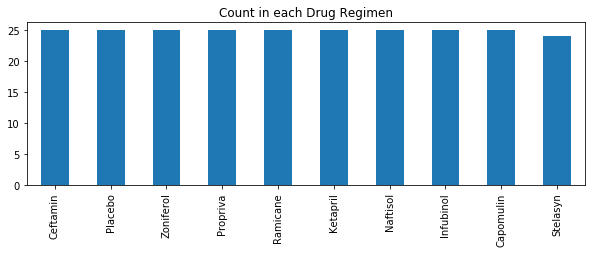

In [8]:
mouse_metadata['Drug Regimen'].value_counts().plot(kind='bar',figsize=(10,3),title="Count in each Drug Regimen")

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

<BarContainer object of 10 artists>

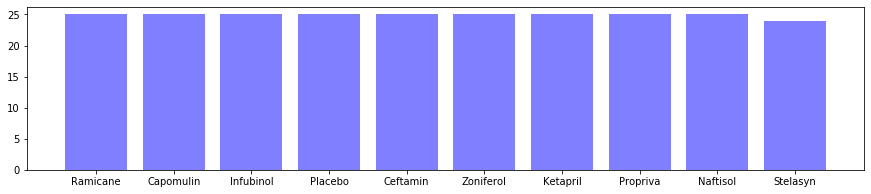

In [10]:
regimen_dict = {}
for i in range(len(mouse_metadata)) : 
    if mouse_metadata.loc[i,"Drug Regimen"] in regimen_dict:
        regimen_dict[mouse_metadata.loc[i,"Drug Regimen"]] += 1
    else:
        regimen_dict[mouse_metadata.loc[i,"Drug Regimen"]] = 1

x_axis = [z for z in sorted(regimen_dict, key=regimen_dict.get, reverse=True)]
y_axis = [regimen_dict[z] for z in sorted(regimen_dict, key=regimen_dict.get, reverse=True)]
plt.figure(figsize=(15,3))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")


## Pie plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

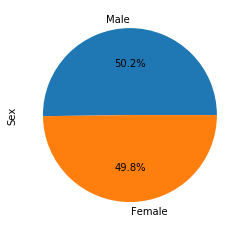

In [12]:
mouse_metadata['Sex'].value_counts().plot.pie(y='Sex',autopct="%1.1f%%")

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

([<matplotlib.patches.Wedge at 0x1a19986050>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

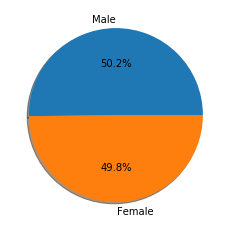

In [14]:
sex_dict = {}
for i in range(len(mouse_metadata)) : 
    if mouse_metadata.loc[i,"Sex"] in sex_dict:
        sex_dict[mouse_metadata.loc[i,"Sex"]] += 1
    else:
        sex_dict[mouse_metadata.loc[i,"Sex"]] = 1

x_axis = [z for z in sorted(sex_dict, key=sex_dict.get, reverse=True)]
y_axis = [sex_dict[z] for z in sorted(sex_dict, key=sex_dict.get, reverse=True)]
fig1, ax1 = plt.subplots()
ax1.pie(y_axis, labels=x_axis, autopct='%1.1f%%',shadow=True)

## Quartiles, outliers and boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [16]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [17]:
selected_regimen = mouse_metadata[mouse_metadata["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
Merged_df = pd.merge(selected_regimen, study_results, on='Mouse ID', how='inner')
last_timepoint = Merged_df.groupby("Mouse ID").last()
last_timepoint = last_timepoint.reset_index()
last_timepoint[:10]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
5,a520,Ramicane,Male,13,21,45,38.810366,1
6,a577,Infubinol,Female,6,25,30,57.031862,2
7,a644,Ramicane,Female,7,17,45,32.978522,1
8,a685,Infubinol,Male,8,30,45,66.083066,3
9,b128,Capomulin,Female,9,22,45,38.982878,2


In [18]:
quantile_df = last_timepoint.drop(columns=["Timepoint","Metastatic Sites","Mouse ID","Weight (g)","Age_months","Sex"])
quartile_25=quantile_df.groupby('Drug Regimen').quantile(0.25)
quartile_50=quantile_df.groupby('Drug Regimen').quantile(0.5)
quartile_75=quantile_df.groupby('Drug Regimen').quantile(0.75)
print(f"0.25 quantiles :{quartile_25}")
print("--------------")
print(f"0.5 quantiles :{quartile_50}")
print("--------------")
print(f"0.75 quantiles :{quartile_75}")

0.25 quantiles :              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              32.377357
Ceftamin               48.722078
Infubinol              54.048608
Ramicane               31.560470
--------------
0.5 quantiles :              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              38.125164
Ceftamin               59.851956
Infubinol              60.165180
Ramicane               36.561652
--------------
0.75 quantiles :              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              40.159220
Ceftamin               64.299830
Infubinol              65.525743
Ramicane               40.659006


In [19]:
iqr=quartile_75-quartile_25
lower_bound = quartile_25 - (1.5*iqr)
upper_bound = quartile_75 + (1.5*iqr)
print(lower_bound)
print("---------")
print(upper_bound)

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              20.704562
Ceftamin               25.355450
Infubinol              36.832905
Ramicane               17.912664
---------
              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              51.832015
Ceftamin               87.666458
Infubinol              82.741446
Ramicane               54.306811


In [20]:
iqr

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,7.781863
Ceftamin,15.577752
Infubinol,11.477135
Ramicane,9.098537


In [21]:
last_timepoint[((last_timepoint["Timepoint"]<20.70) & (last_timepoint["Timepoint"]>51.83)) & (last_timepoint["Drug Regimen"]=="Capomulin")]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [22]:
last_timepoint[((last_timepoint["Timepoint"]<25.36) & (last_timepoint["Timepoint"]>87.66)) & (last_timepoint["Drug Regimen"]=="Ceftamin")]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [23]:
last_timepoint[((last_timepoint["Timepoint"]<36.83) & (last_timepoint["Timepoint"]>82.74)) & (last_timepoint["Drug Regimen"]=="Infubinol")]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [24]:
last_timepoint[((last_timepoint["Timepoint"]<17.91) & (last_timepoint["Timepoint"]>54.30)) & (last_timepoint["Drug Regimen"]=="Ramicane")]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [32]:
#"Based on above observations There are no outliers across regimen"

In [33]:
#mouse_metadata.boxplot(by='Sex',column=['Drug Regimen'],grid = False)

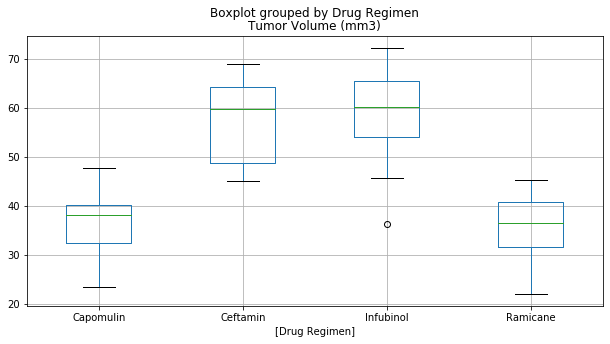

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
last_timepoint.boxplot(column=['Tumor Volume (mm3)'], by=['Drug Regimen'],figsize=(10,5))

## Line and scatter plots

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [36]:
Capomulin = mouse_metadata[mouse_metadata["Drug Regimen"]=="Capomulin"]
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
6,f966,Capomulin,Male,16,17
10,u364,Capomulin,Male,18,17
12,y793,Capomulin,Male,17,17
13,r554,Capomulin,Female,8,17
14,m957,Capomulin,Female,3,19
16,t565,Capomulin,Female,20,17
20,i738,Capomulin,Female,23,20


In [37]:
Capomulin_analysis = pd.merge(Capomulin, study_results, on='Mouse ID', how='inner')
Capomulin_analysis.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0


In [38]:
Capomulin_analysis.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0


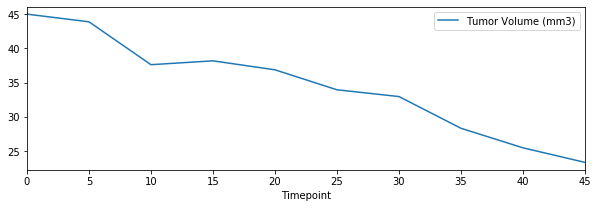

In [39]:
Capomulin_analysis[:10].plot(x='Timepoint', y='Tumor Volume (mm3)',figsize=(10,3))

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [31]:
Capomulin_analysis.groupby("Mouse ID").mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


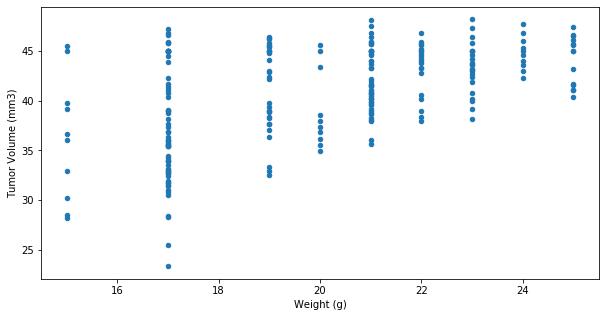

In [34]:
Capomulin_analysis.plot(kind='scatter',x='Weight (g)', y='Tumor Volume (mm3)',figsize=(10,5))

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [38]:
Capomulin_analysis.corr(method ='pearson')

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Age_months,1.000000,-0.169172,-0.057964,-0.021604,0.006748
Weight (g),-0.169172,1.000000,-0.035271,0.525700,-0.119149
Timepoint,-0.057964,-0.035271,1.000000,-0.584271,0.584006
Tumor Volume (mm3),-0.021604,0.525700,-0.584271,1.000000,-0.313092
Metastatic Sites,0.006748,-0.119149,0.584006,-0.313092,1.000000


In [46]:
corr_coef = Capomulin_analysis.corr(method ='pearson').loc["Weight (g)"]["Tumor Volume (mm3)"]
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is: {round(corr_coef,2)}")

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is: 0.53


The slope of line is:0.96


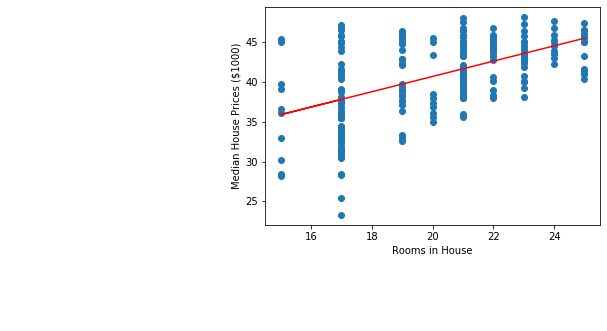

In [48]:
from scipy.stats import linregress
x_values = Capomulin_analysis['Weight (g)']
y_values = Capomulin_analysis['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f"The slope of line is:{round(slope,2)}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()